In [9]:
import os
import zipfile
import pandas as pd
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from sklearn.model_selection import train_test_split
from PIL import Image
import os
import shutil

In [3]:
dataset_zip = 'data_multi.zip'
extract_dir = 'data_multi/'

with zipfile.ZipFile(dataset_zip, 'r') as zip_ref:
    zip_ref.extractall(extract_dir)

In [5]:
train_csv_path = os.path.join(extract_dir, 'train', '_classes.csv')
valid_csv_path = os.path.join(extract_dir, 'valid', '_classes.csv')
test_csv_path = os.path.join(extract_dir, 'test', '_classes.csv')


In [6]:
def load_data(csv_path, base_dir, img_width, img_height):
    data = pd.read_csv(csv_path)
    images = []
    labels = []
    
    for index, row in data.iterrows():
        img_path = os.path.join(base_dir, row['filename'])
        image = Image.open(img_path)
        image = image.resize((img_width, img_height))
        image = tf.keras.preprocessing.image.img_to_array(image)
        images.append(image)
        
        # Assuming labels are in the rest of the columns
        label_row = row[1:].values.astype(np.float32)
        labels.append(label_row)
    
    images = np.array(images)
    labels = np.array(labels)
    
    return images, labels

In [14]:
# Load the datasets
img_width, img_height = 224, 224
x_train, y_train = load_data(train_csv_path, os.path.join(extract_dir, 'train'), img_width, img_height)
x_valid, y_valid = load_data(valid_csv_path, os.path.join(extract_dir, 'valid'), img_width, img_height)
x_test, y_test = load_data(test_csv_path, os.path.join(extract_dir, 'test'), img_width, img_height)

In [15]:
def display_sample_images(images, labels, num_images):
    plt.figure(figsize=(15, 15))
    for i in range(min(num_images, len(images))):
        plt.subplot(1, num_images, i + 1)
        plt.imshow(images[i].astype("uint8"))
        label_names = ['Acne', 'Blackhead', 'Conglobata', 'Crystalline']
        label_string = ', '.join([label_names[j] for j in range(len(label_names)) if labels[i][j] == 1])
        plt.title(label_string)
        plt.axis('off')
    plt.show()

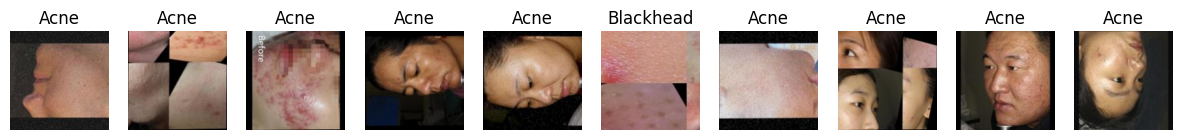

In [20]:
display_sample_images(x_train, y_train, 10)


In [23]:
# Train the model
batch_size = 32
epochs = 25

# Data augmentation
datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

train_generator = datagen.flow(x_train, y_train, batch_size=batch_size)
validation_generator = ImageDataGenerator().flow(x_valid, y_valid, batch_size=batch_size)


In [27]:
# Define the model
base_model = ResNet50(input_shape=(img_width, img_height, 3), include_top=False, weights='imagenet')
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(1024, activation='relu')(x)
predictions = Dense(15, activation='sigmoid')(x)  # Assuming 4 classes

model = Model(inputs=base_model.input, outputs=predictions)

# Compile the model
model.compile(optimizer=tf.keras.optimizers.Adam(), 
              loss='binary_crossentropy', 
              metrics=['accuracy'])

In [28]:
history = model.fit(train_generator,
                    steps_per_epoch=len(x_train) // batch_size,
                    epochs=epochs,
                    validation_data=validation_generator,
                    validation_steps=len(x_valid) // batch_size)

Epoch 1/25


c:\Users\LENOVO\Documents\KULIAH\Semester 6\Bangkit 2024\Capstone Project\caps-env\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


548/548 ━━━━━━━━━━━━━━━━━━━━ 3461s 6s/step - accuracy: 0.7180 - loss: 0.1881 - val_accuracy: 0.6499 - val_loss: 0.1798
Epoch 2/25
  1/548 ━━━━━━━━━━━━━━━━━━━━ 58:39 6s/step - accuracy: 0.7500 - loss: 0.1212

C:\Users\LENOVO\AppData\Local\Programs\Python\Python311\Lib\contextlib.py:155: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


548/548 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - accuracy: 0.7500 - loss: 0.1212 - val_accuracy: 0.6522 - val_loss: 0.1904
Epoch 3/25
548/548 ━━━━━━━━━━━━━━━━━━━━ 3413s 6s/step - accuracy: 0.7309 - loss: 0.1491 - val_accuracy: 0.7717 - val_loss: 0.7803
Epoch 4/25
548/548 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - accuracy: 0.7500 - loss: 0.2452 - val_accuracy: 0.6522 - val_loss: 1.0888
Epoch 5/25
548/548 ━━━━━━━━━━━━━━━━━━━━ 3281s 6s/step - accuracy: 0.7357 - loss: 0.1491 - val_accuracy: 0.6849 - val_loss: 0.1639
Epoch 6/25
548/548 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - accuracy: 0.8125 - loss: 0.1237 - val_accuracy: 0.4348 - val_loss: 0.2671
Epoch 7/25
548/548 ━━━━━━━━━━━━━━━━━━━━ 3392s 6s/step - accuracy: 0.7318 - loss: 0.1437 - val_accuracy: 0.6601 - val_loss: 0.1866
Epoch 8/25
548/548 ━━━━━━━━━━━━━━━━━━━━ 8s 2ms/step - accuracy: 0.7500 - loss: 0.1683 - val_accuracy: 0.6957 - val_loss: 0.1782
Epoch 9/25
100/548 ━━━━━━━━━━━━━━━━━━━━ 43:31 6s/step - accuracy: 0.7261 - loss: 0.1413

KeyboardInterrupt: 

In [6]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

# Train Generator
train_generator = train_datagen.flow_from_dataframe(
    train_data,
    directory='data_multi/train', 
    x_col='filename',
    y_col=list(train_data.columns[1:]), 
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='raw'
)


Found 17555 validated image filenames.


In [7]:
validation_datagen = ImageDataGenerator(rescale=1./255)

validation_generator = validation_datagen.flow_from_dataframe(
    valid_data,
    directory='data_multi/valid', 
    x_col='filename',
    y_col=list(valid_data.columns[1:]), 
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='raw'
)

Found 1591 validated image filenames.


In [8]:
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(img_height, img_width, 3)),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(len(train_data.columns[1:]), activation='softmax')
])

model.summary()

c:\Users\LENOVO\Documents\KULIAH\Semester 6\Bangkit 2024\Capstone Project\caps-env\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 222, 222, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 111, 111, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 109, 109, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 54, 54, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 52, 52, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 26, 26, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 24, 24, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 12, 12, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 18432)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │     9,437,696 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 15)             │         7,695 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 9,686,223 (36.95 MB)

 Trainable params: 9,686,223 (36.95 MB)

 Non-trainable params: 0 (0.00 B)

In [9]:
# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(
    train_generator,
    epochs=5,
    validation_data=validation_datagen
)

Epoch 1/5


c:\Users\LENOVO\Documents\KULIAH\Semester 6\Bangkit 2024\Capstone Project\caps-env\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


549/549 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.7032 - loss: 0.2211

ValueError: Unrecognized data type: x=<keras.src.legacy.preprocessing.image.ImageDataGenerator object at 0x000001BFA8602390> (of type <class 'keras.src.legacy.preprocessing.image.ImageDataGenerator'>)